<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [68]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel
import warnings
warnings.filterwarnings("ignore")


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [69]:
# you can write your code here
X, Y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.20,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_tr,x_cv,y_tr,y_cv = train_test_split(x_train, y_train,stratify=y_train,test_size=0.20,random_state=42)

svc = SVC(C=100,gamma=0.001)
svc.fit(x_tr,y_tr)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
from numpy.linalg import norm
from sklearn.metrics.pairwise import rbf_kernel
def decision_function(x_cv):
  sv = svc.support_vectors_
  ker_mat = rbf_kernel(X=x_cv,Y=sv,gamma=0.001)
  pred=list()
  for i,test in enumerate(x_cv):
    res = 0
    for j,sv_ in enumerate(sv):
      res += ( ker_mat[i][j] * svc.dual_coef_[0][j] ) 
    pred.append((res + (svc.intercept_)))
  return pd.DataFrame(pred,columns=['y_hat'])

In [71]:
fcv = svc.decision_function(x_cv) # sklearn's decision function output.

In [72]:
implemented_cv = decision_function(x_cv) # implemented code for deciscion function as a part of task

In [73]:
implemented_cv['fcv'] = fcv # appendeing output of sklearn's decision function and implemented deciscion function

In [74]:
implemented_cv # comparing values .

,y_hat,fcv
0,-2.021215,-2.021215
1,1.646756,1.646756
2,-1.862529,-1.862529
3,-2.583835,-2.583835
4,-0.569751,-0.569751
...,...,...
795,2.312139,2.312139
796,-2.357006,-2.357006
797,-0.358116,-0.358116
798,1.426593,1.426593


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


#SGD ALGO

In [105]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return

    return 1/(1+np.exp(-z))

def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    b = 0
    w = np.zeros_like(dim)

    return w,b


def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    #print(x.shape,w.shape)
    z = np.dot(x,w) + b
    #print(z)
    #print(((y-sigmoid(z))),x)
    a = ((y-sigmoid(z))*x)
    #print(a)
    b = ((alpha/N)*w)
    dw = a-b
    return dw


def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     z = ( (np.dot(x,w)) + b )
     db = (y-(sigmoid(z)))
     return (db)


def pred(w,b, X):
    N = len(X)
    predict = []
    #w = list(w)
    for i in range(N):
        z = np.dot(X[i],w) + b
        predict.append(sigmoid(z)) 
    return np.array(predict)
#print(1-np.sum(y_train - pred(w,b,x_train))/len(x_train))
#print(1-np.sum(y_test  - pred(w,b,x_test))/len(x_test))


import math
def logloss(y_true,y_pred,N_pos,N_neg):
    '''In this function, we will compute log loss '''
    l=0
    #print(y_pred)
    for i in range(len(y_true)):
      if y_true[i]==1:
        y_true[i] = N_pos
      else:
        y_true[i] = N_neg
      l+= ( (y_true[i]*(math.log10(y_pred[i]))) + ((1-y_true[i])*(math.log10(1-y_pred[i]))) )
    loss = (-1/len(y_true))*l
    return loss


from tqdm import tqdm
from collections import OrderedDict
def train(x_train,y_train,x_test,y_test,epochs,alpha,eta0,N_pos,N_neg):
    w,b = initialize_weights(x_train[0])
    N = len(x_train)
    tr_loss,ts_loss = [],[]
    #loss = OrderedDict()
    initial_loss = 0
    for epoch in tqdm(range(epochs)):
      #print(epoch)
      for i in range(x_train.shape[0]):
        dw = gradient_dw(x_train[i],y_train[i],w,b,alpha,N)
        db = gradient_db(x_train[i],y_train[i],w,b)
        w += (eta0*dw)
        b += (eta0*db)
      #x = decision_function(x_train)
      y_pred_tr = pred(w,b,x_train)
      y_pred_ts = pred(w,b,x_test)
      tr_loss.append(logloss(y_train,y_pred_tr,N_pos,N_neg))
      ts_loss.append(logloss(y_test,y_pred_ts,N_pos,N_neg))
      #loss[logloss(y_test,y_pred_ts)] = w
      #print(y_train,y_pred_tr)
      #print(y_test,y_pred_ts)
      #ts_los = logloss(y_test,y_pred_ts)
      #if abs(initial_loss - ts_los  ) <= (10**(-3)):
      #  print('(ts_los - initial_loss):',(ts_los, initial_loss),abs(ts_los - initial_loss),'\n')
      #  break
      #print('(ts_los - initial_loss):',(ts_los, initial_loss),abs(ts_los - initial_loss),'\n')
      #initial_loss = ts_los
    return w,b,tr_loss,ts_loss



In [115]:
alpha=0.0001 
eta0=0.0001
N=len(x_train)
epochs=14

In [116]:
'''
creating the dataset for calibration
'''
#D_cv = decision_function(x_cv)  
fcv = pd.DataFrame(svc.decision_function(x_cv),columns=['f_cv'])
D_cv = fcv
D_cv['y_true'] = y_cv
#D_cv.sort_values(by='y_hat',inplace=True)
#c = dict(pd.DataFrame(y_tr).value_counts()) # getting counts
#N_pos = (c[1,]+1)/(c[1,]+2) # computing N_pos
#N_neg = 1/(c[0,]+2) # computing N_neg

y_train = pd.DataFrame(y_train)
num_pos = y_train[y_train==1].sum()
num_neg = y_train[y_train==0].sum()
N_pos = (num_pos+1)/(num_pos+2) # computing N_pos
N_neg = 1/(num_neg+2) # computing N_neg


In [117]:
# splitting cv data to find optimal w and b
calib_x_tr,calib_x_cv,calib_y_tr,calib_y_cv = train_test_split(D_cv['f_cv'], D_cv['y_true'],stratify=D_cv['y_true'],test_size=0.20,random_state=42)

# passing splitted cv data to train function for optimal w and b values
w,b,tr_loss,ts_loss = train(x_train=np.array(calib_x_tr),
                            y_train=np.array(calib_y_tr),
                            x_test=np.array(calib_x_cv),
                            y_test=np.array(calib_y_cv),
                            epochs=epochs,
                            alpha=alpha,
                            eta0=eta0,
                            N_pos=N_pos,N_neg=N_neg)

100%|██████████| 14/14 [00:00<00:00, 24.49it/s]


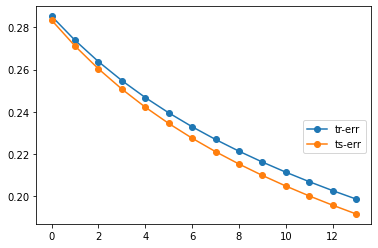

In [118]:
import matplotlib.pyplot as plt
plt.plot(tr_loss,'-o',label='tr-err')
plt.plot(ts_loss,'-o',label='ts-err')
plt.legend(bbox_to_anchor=(1,0.5))

In [119]:
def pred_prob(w,b,x_test):
  return pd.DataFrame(1/(1+(np.exp(-((np.dot(decision_function(x_test),w))+b)))),columns=['prob_values'])

In [122]:
pred_prob(w,b,x_test)

,prob_values
0,0.211260
1,0.366319
2,0.209828
3,0.305193
4,0.240818
...,...
995,0.214169
996,0.196957
997,0.421671
998,0.295574
